In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
creditcard_df = pd.read_csv('CC GENERAL.csv')


In [3]:
creditcard_df.shape


(8950, 18)

In [4]:
creditcard_df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()


47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


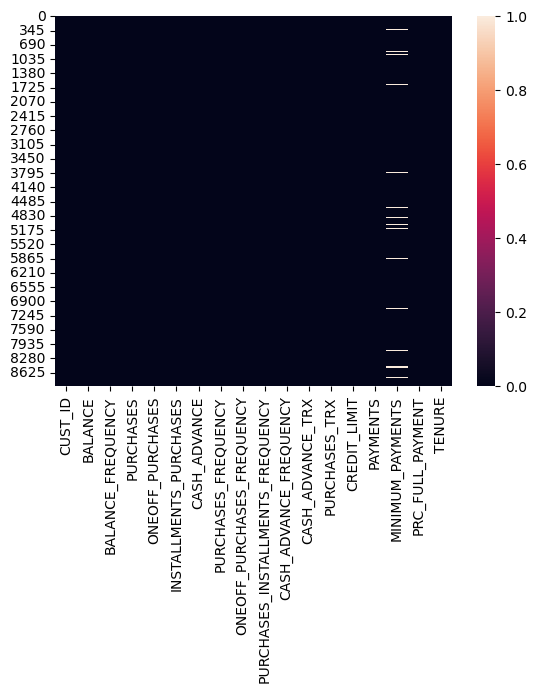

In [10]:
sns.heatmap(creditcard_df.isnull());


In [11]:
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df['MINIMUM_PAYMENTS'].mean()


864.2065423050828

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [14]:
creditcard_df['CREDIT_LIMIT'].mean()


4494.449450364621

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [16]:
creditcard_df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

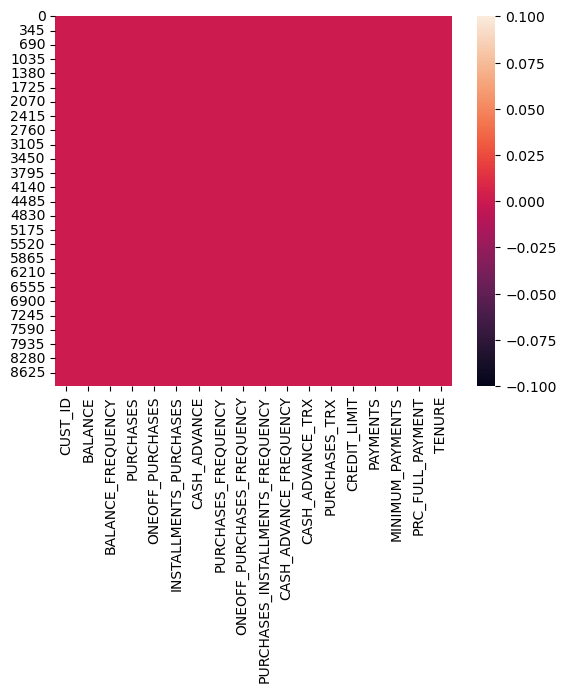

In [17]:
sns.heatmap(creditcard_df.isnull());


In [18]:
creditcard_df.duplicated().sum()


0

In [19]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)


In [20]:
creditcard_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
len(creditcard_df.columns)


17

C:\Users\himan\AppData\Local\Temp\ipykernel_15256\1998933226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
C:\Users\himan\AppData\Local\Temp\ipykernel_15256\1998933226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

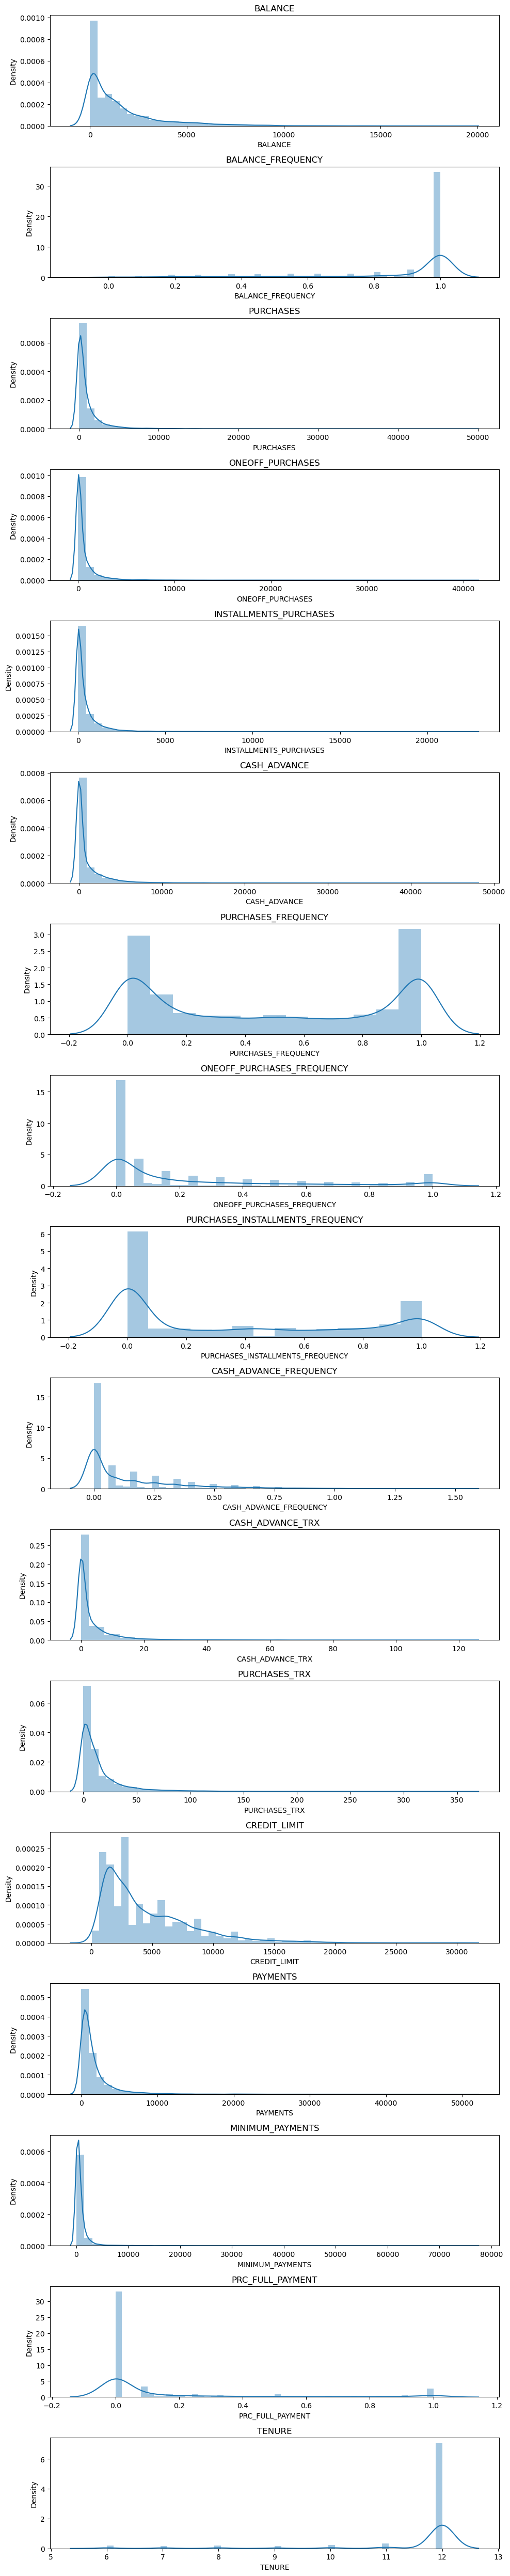

In [23]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [24]:
correlations = creditcard_df.corr()


<Axes: >

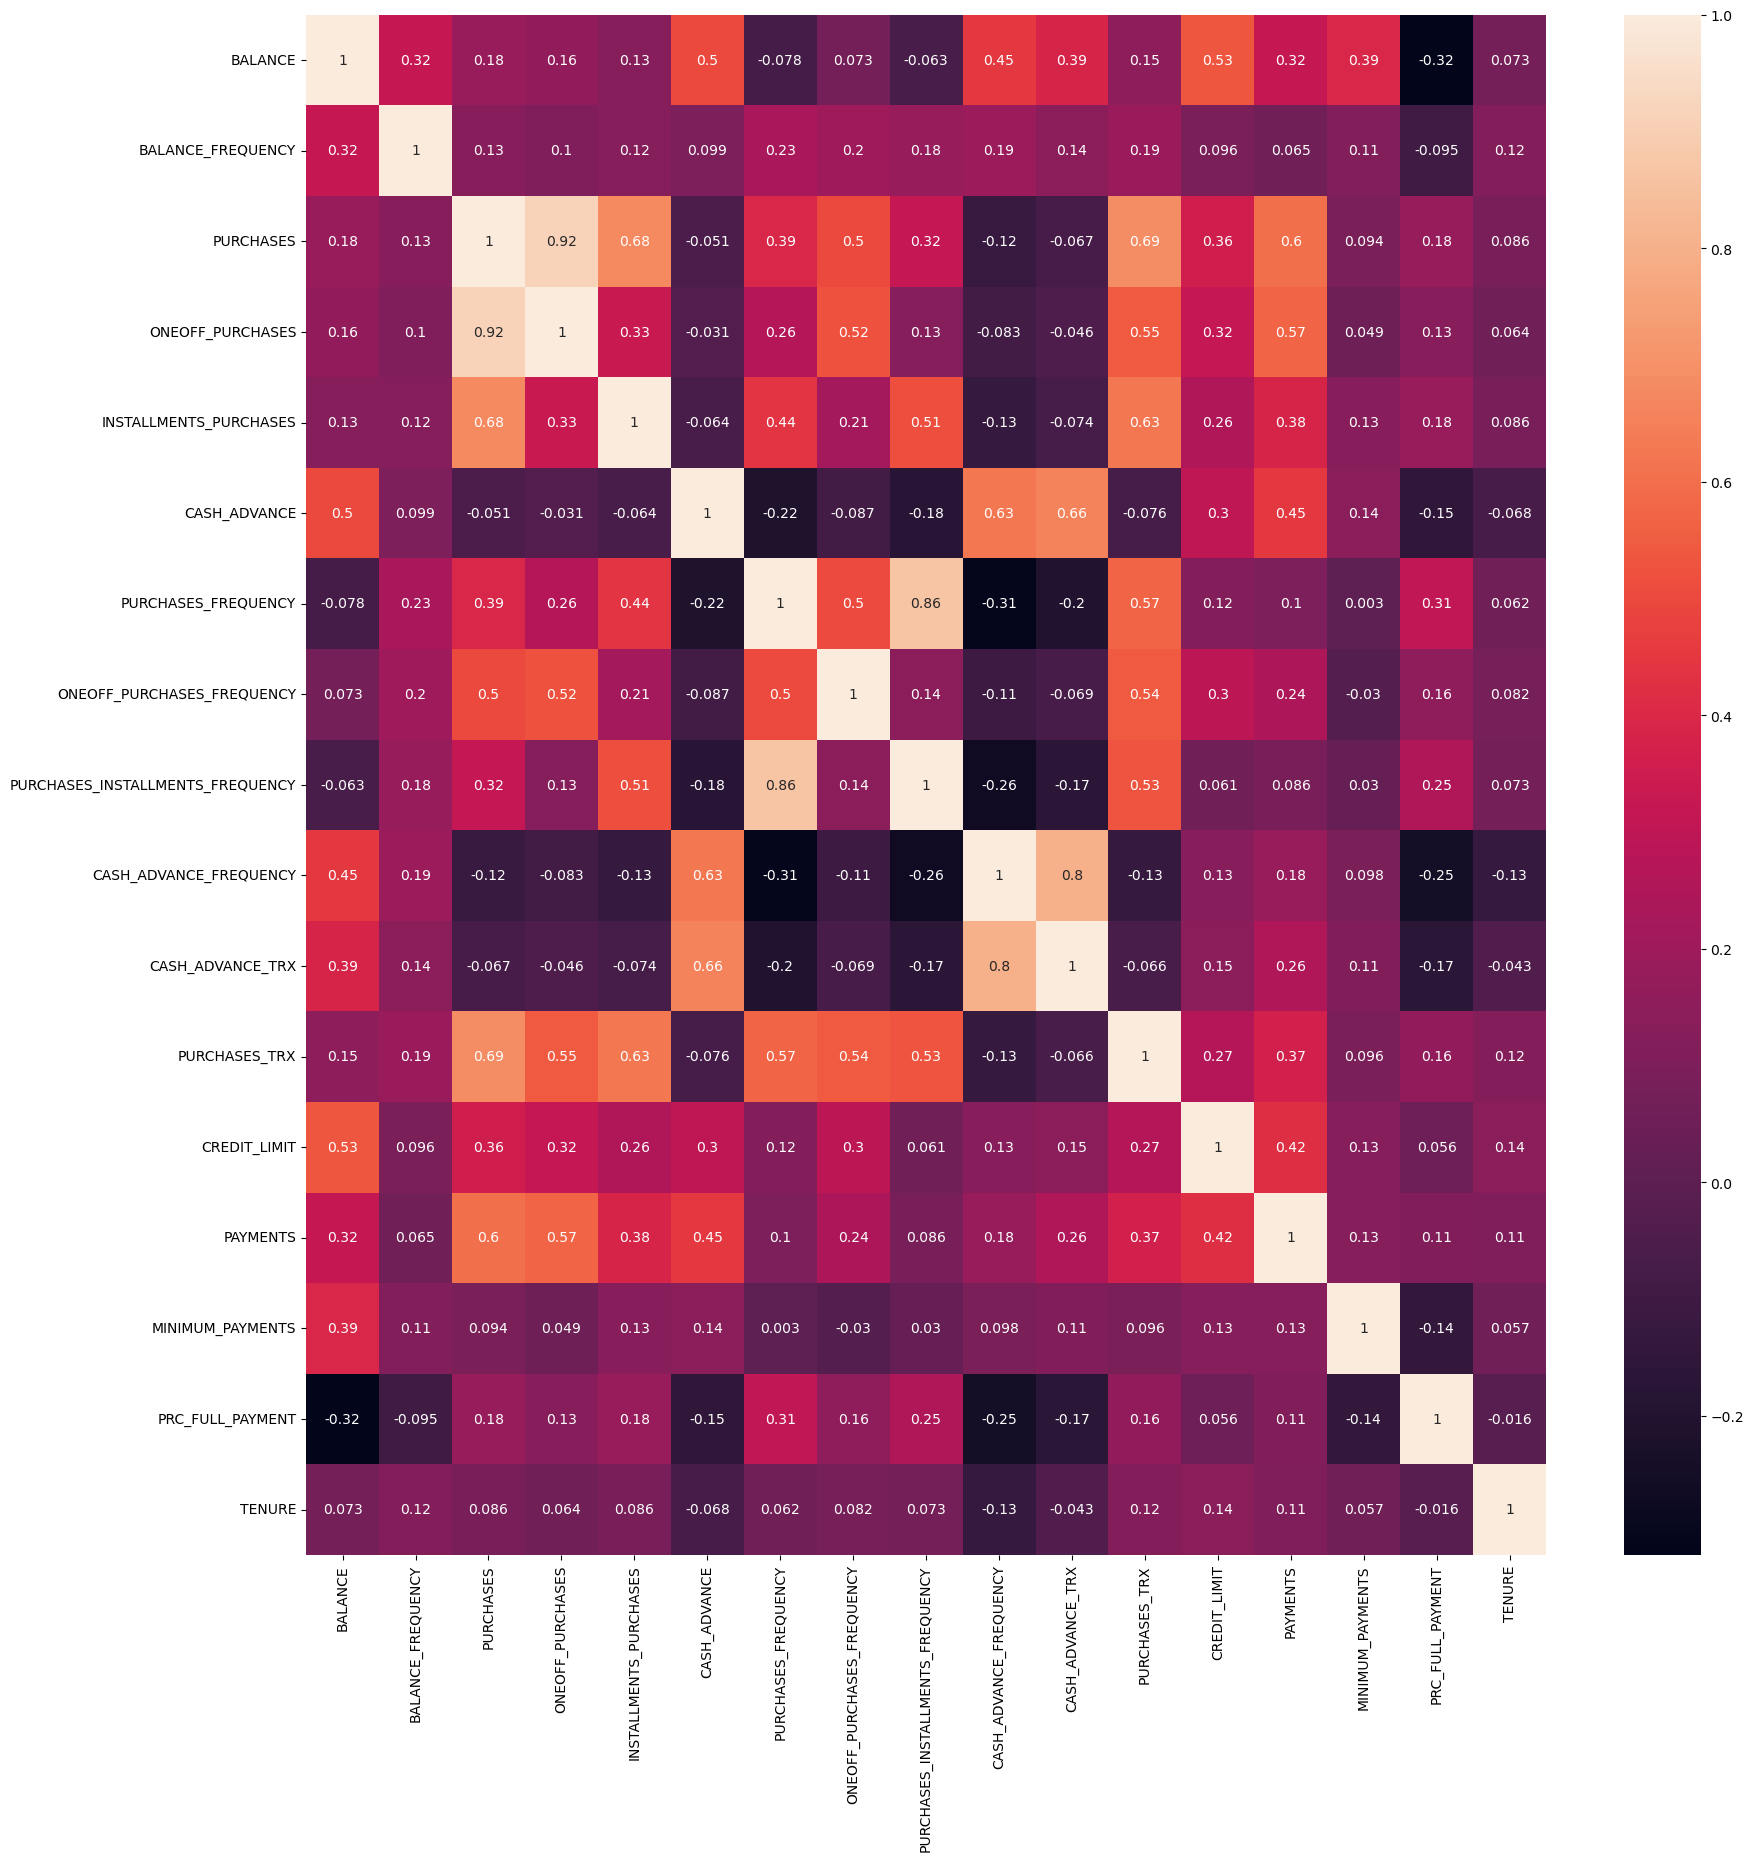

In [25]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [26]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])


(0.0, 19043.13856)

In [27]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)


In [28]:
type(creditcard_df_scaled), type(creditcard_df)


(numpy.ndarray, pandas.core.frame.DataFrame)

In [29]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])


(-0.9604333444542572, 0.36067954425377496)

In [30]:
creditcard_df_scaled


array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [31]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [32]:
print(wcss_1)


[152149.99999999994, 128957.7949897037, 111986.64440741205, 106846.07069756831, 91810.19669246358, 85777.43050092235, 79528.26810128253, 75569.44343168712, 71722.74924646763, 68376.82873683663, 64180.5926519285, 61406.66720031956, 60500.683754826285, 57575.80454674582, 56304.62358244245, 55154.56654414602, 53628.53185290209, 52382.94123134622, 50675.5610821239]


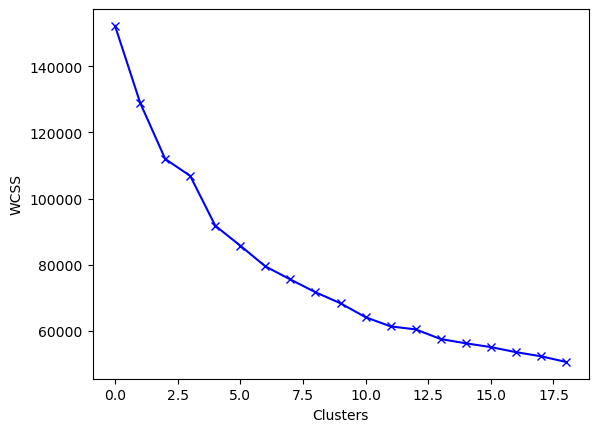

In [33]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');


In [34]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [35]:
labels, len(labels)


(array([0, 6, 2, ..., 4, 4, 4]), 8950)

In [36]:
np.unique(labels, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 array([2719,  423, 1096, 2012,  622,   30,  867, 1181], dtype=int64))

In [37]:
kmeans.cluster_centers_


array([[ 1.69775793e-02,  4.03704108e-01, -3.61492265e-01,
        -2.46785072e-01, -4.01243254e-01, -9.11515194e-02,
        -8.65324778e-01, -4.10225249e-01, -7.56684444e-01,
         1.09397456e-01, -2.51983633e-02, -4.86238617e-01,
        -3.05361564e-01, -2.49583314e-01, -9.66188128e-03,
        -4.57045384e-01,  2.72736485e-01],
       [ 9.01817094e-01,  4.66986488e-01,  2.27096268e+00,
         1.75693590e+00,  2.14191957e+00, -1.95511636e-01,
         1.15862945e+00,  1.58388866e+00,  1.22619838e+00,
        -3.12181377e-01, -2.12097314e-01,  2.78145233e+00,
         1.23894709e+00,  1.29029506e+00,  4.41655026e-01,
         3.04777847e-01,  3.34181630e-01],
       [-1.64580047e-01,  3.91960519e-01,  4.53683590e-01,
         5.93384857e-01, -1.75779564e-02, -3.32645771e-01,
         9.43031862e-01,  1.87729874e+00,  8.94352312e-02,
        -4.06389542e-01, -3.22314065e-01,  5.24292702e-01,
         3.75369768e-01,  8.74584026e-02, -1.62491775e-01,
         4.05496291e-01,  2.6

In [38]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.016978,0.403704,-0.361492,-0.246785,-0.401243,-0.091152,-0.865325,-0.410225,-0.756684,0.109397,-0.025198,-0.486239,-0.305362,-0.249583,-0.009662,-0.457045,0.272736
1,0.901817,0.466986,2.270963,1.756936,2.141920,-0.195512,1.158629,1.583889,1.226198,-0.312181,-0.212097,2.781452,1.238947,1.290295,0.441655,0.304778,0.334182
2,-0.164580,0.391961,0.453684,0.593385,-0.017578,-0.332646,0.943032,1.877299,0.089435,-0.406390,-0.322314,0.524293,0.375370,0.087458,-0.162492,0.405496,0.261138
3,-0.364330,0.333247,-0.036790,-0.244128,0.361328,-0.363466,0.992591,-0.386638,1.207905,-0.475047,-0.360997,0.188556,-0.261173,-0.216287,-0.032181,0.315518,0.257433
4,-0.336050,-0.347078,-0.289267,-0.215966,-0.286835,0.068284,-0.203078,-0.288661,-0.224549,0.308663,0.000996,-0.388117,-0.567159,-0.392680,-0.209145,0.014011,-3.203733
5,1.923051,0.337717,11.212042,10.600367,7.033118,0.419625,1.046983,1.915501,0.981334,-0.258912,0.061229,5.362438,3.044064,8.098975,1.120318,1.110132,0.310863
6,1.689948,0.396143,-0.218924,-0.157453,-0.228441,2.017284,-0.478708,-0.214924,-0.414713,1.922067,1.937125,-0.267579,1.026000,0.808131,0.555558,-0.395159,0.070229
7,-0.701163,-2.144787,-0.311233,-0.235823,-0.302542,-0.319756,-0.557150,-0.445187,-0.440134,-0.520622,-0.376063,-0.419936,-0.175963,-0.192408,-0.256478,0.283762,0.199336


In [39]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1599.812226,0.972905,230.871037,182.824697,48.228349,787.722118,0.143054,0.080080,0.063712,0.157036,3.076866,2.623759,3383.419149,1010.624613,841.689936,0.020037,11.882310
1,3441.530986,0.987896,5855.151608,3508.591111,2347.978936,568.874079,0.955365,0.674962,0.851760,0.072674,1.801418,83.846336,9002.245863,5468.421612,1893.464949,0.242857,11.964539
2,1221.915352,0.970123,1972.506816,1577.334699,395.172117,281.297391,0.868835,0.762492,0.399981,0.053822,1.049270,27.741788,5860.198242,1986.327358,485.526315,0.272315,11.866788
3,806.152990,0.956214,924.602614,187.234135,737.812455,216.666839,0.888725,0.087116,0.844490,0.040082,0.785288,19.396620,3544.194931,1107.013539,789.210343,0.245998,11.861829
4,865.015978,0.795051,385.181720,233.977974,151.686061,1122.064941,0.408846,0.116344,0.275196,0.196911,3.255627,5.062701,2430.891398,596.373827,376.802926,0.157813,7.229904
5,5567.142164,0.957273,24957.905000,18186.875667,6771.029333,1858.844605,0.910556,0.773889,0.754444,0.083333,3.666667,148.000000,15570.000000,25178.882690,3475.059479,0.478409,11.933333
6,5081.959655,0.971113,535.471096,331.097001,204.491361,5209.210371,0.298222,0.138342,0.199620,0.519769,16.468281,8.058824,8227.456223,4072.602517,2158.910873,0.038137,11.611303
7,105.063837,0.369191,338.250830,201.019898,137.482244,308.328143,0.266740,0.069650,0.189517,0.030962,0.682472,4.271804,3854.224762,1176.141747,266.495312,0.236710,11.784081


In [40]:
labels, len(labels)


(array([0, 6, 2, ..., 4, 4, 4]), 8950)

In [41]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,6
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


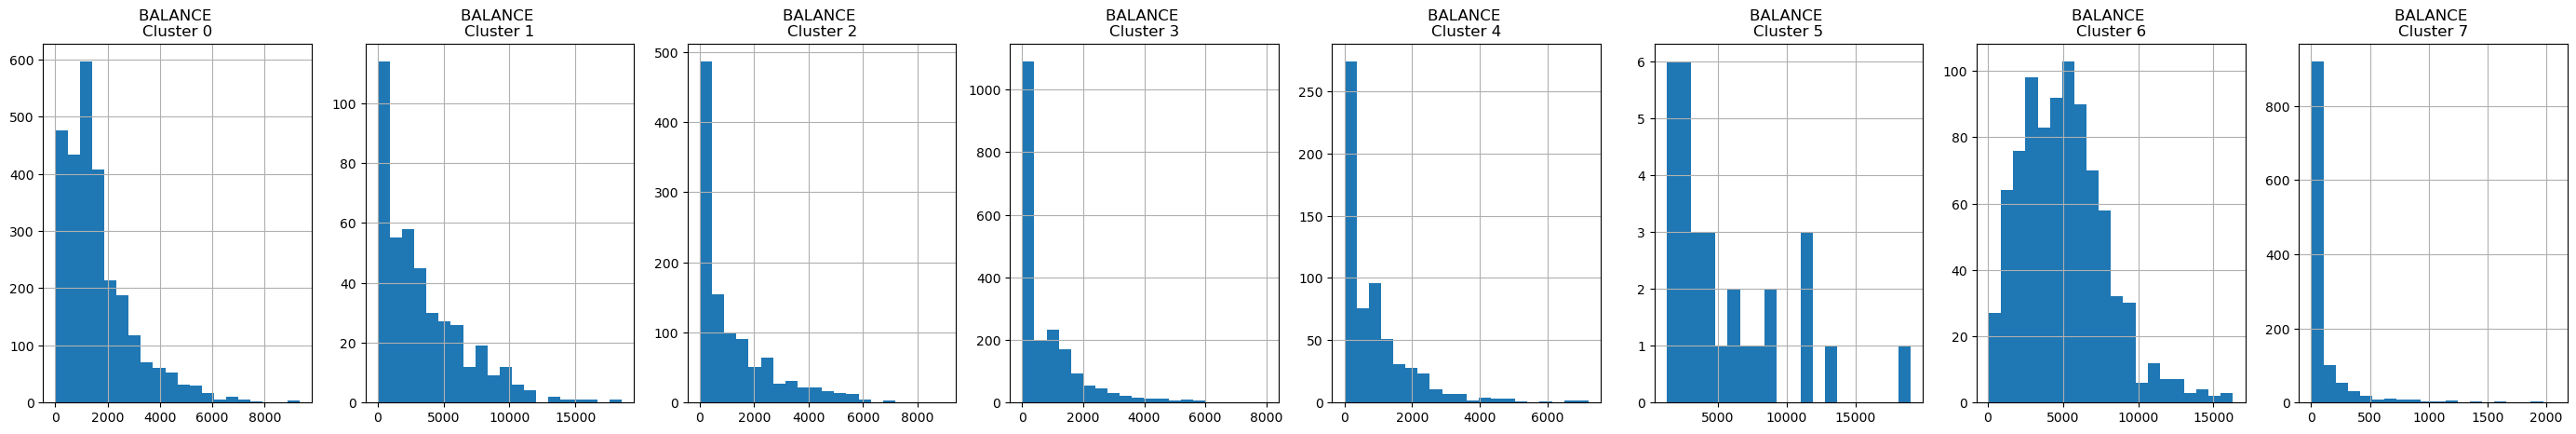

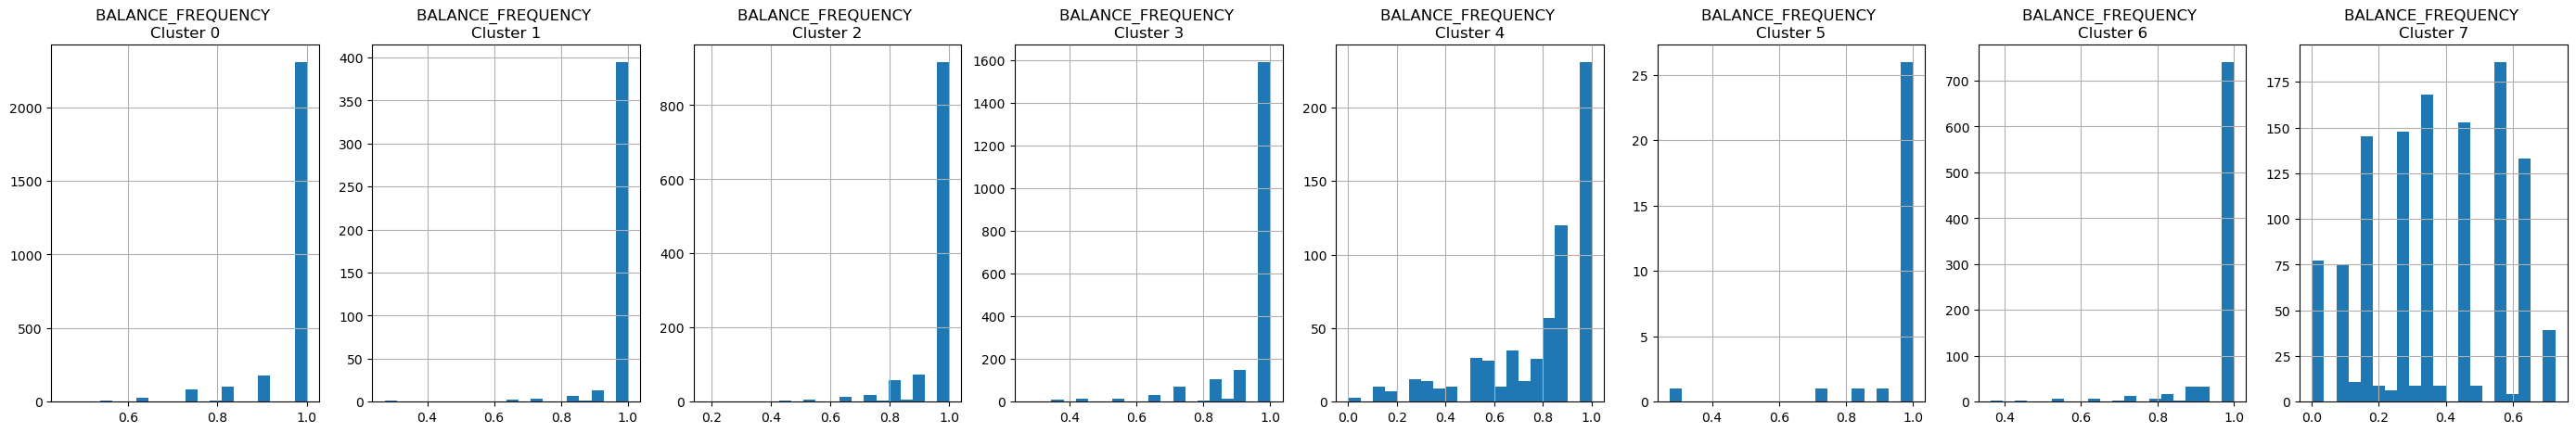

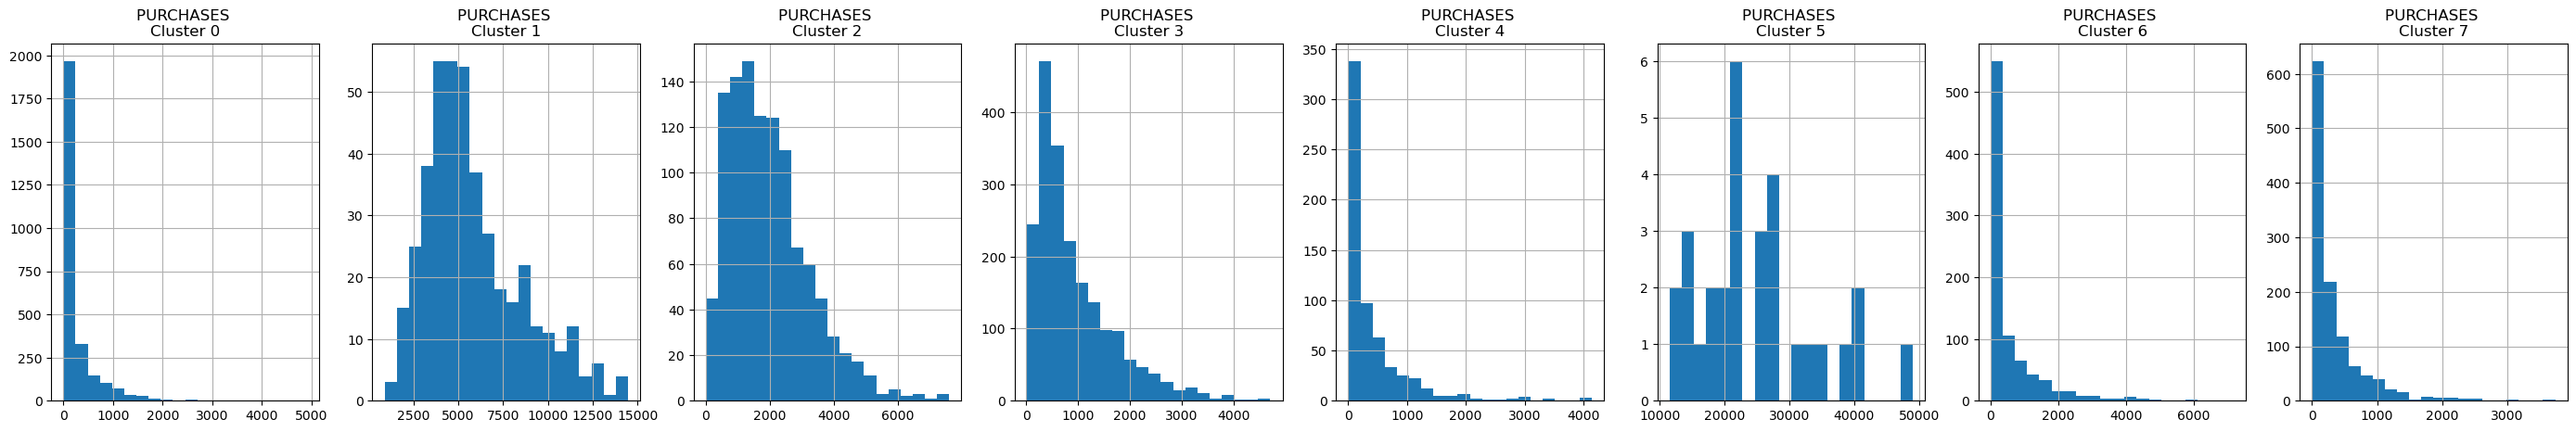

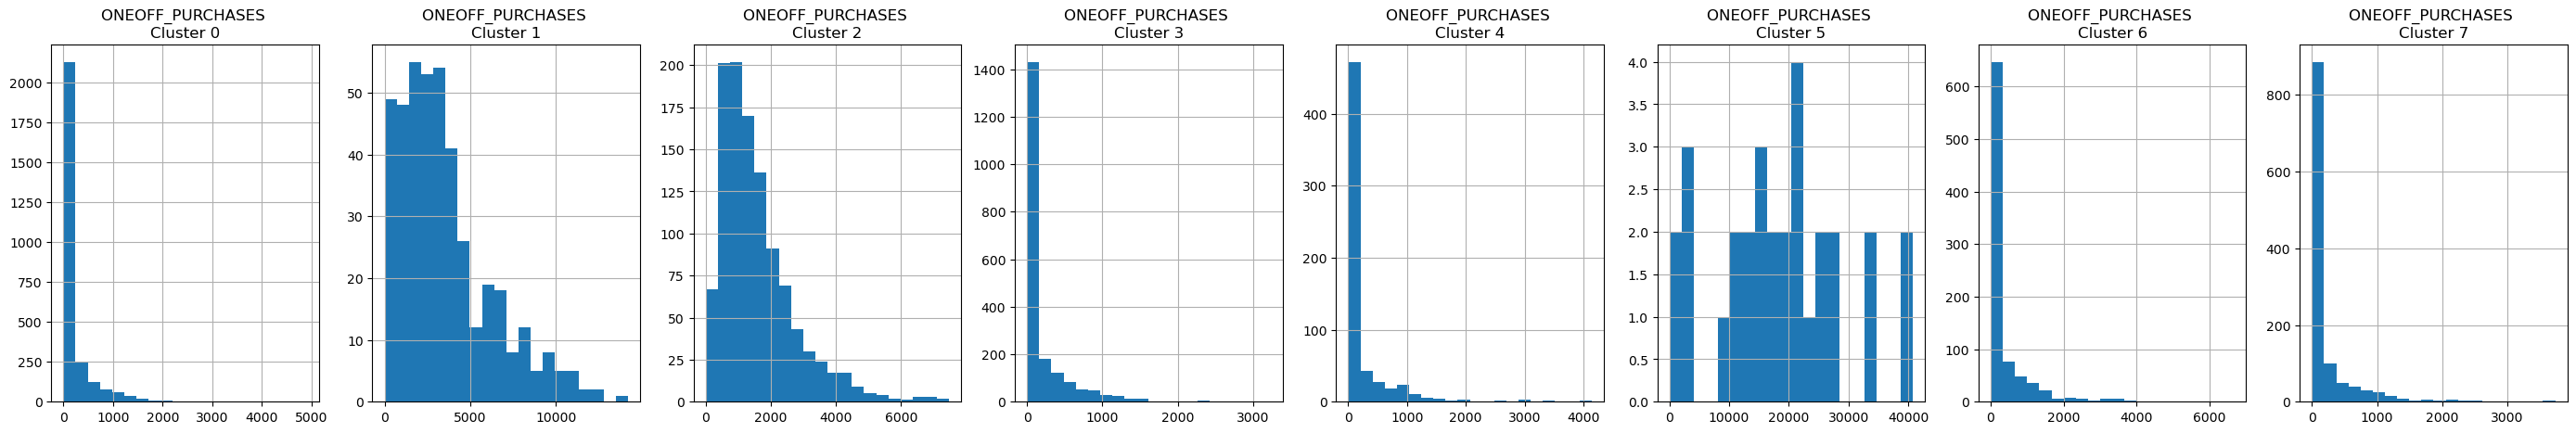

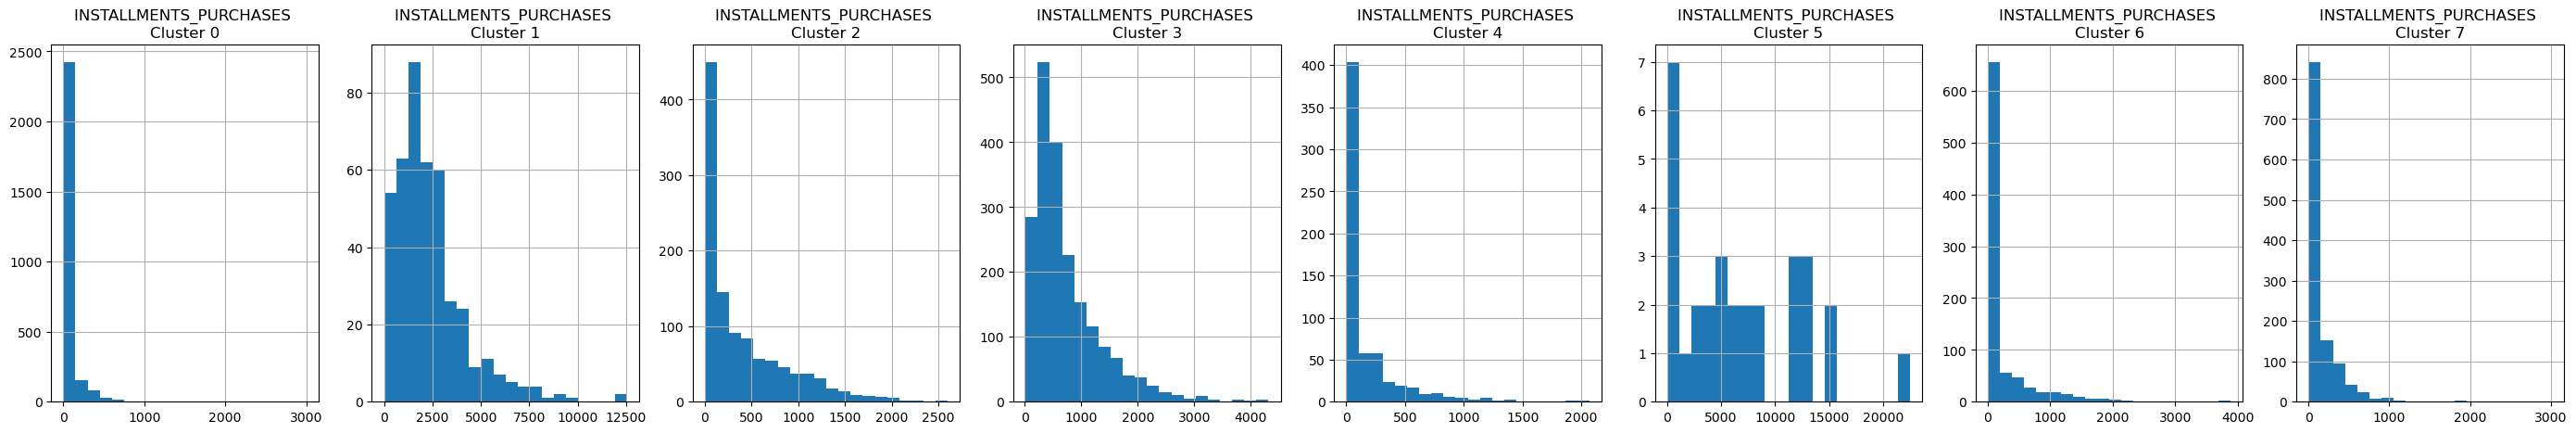

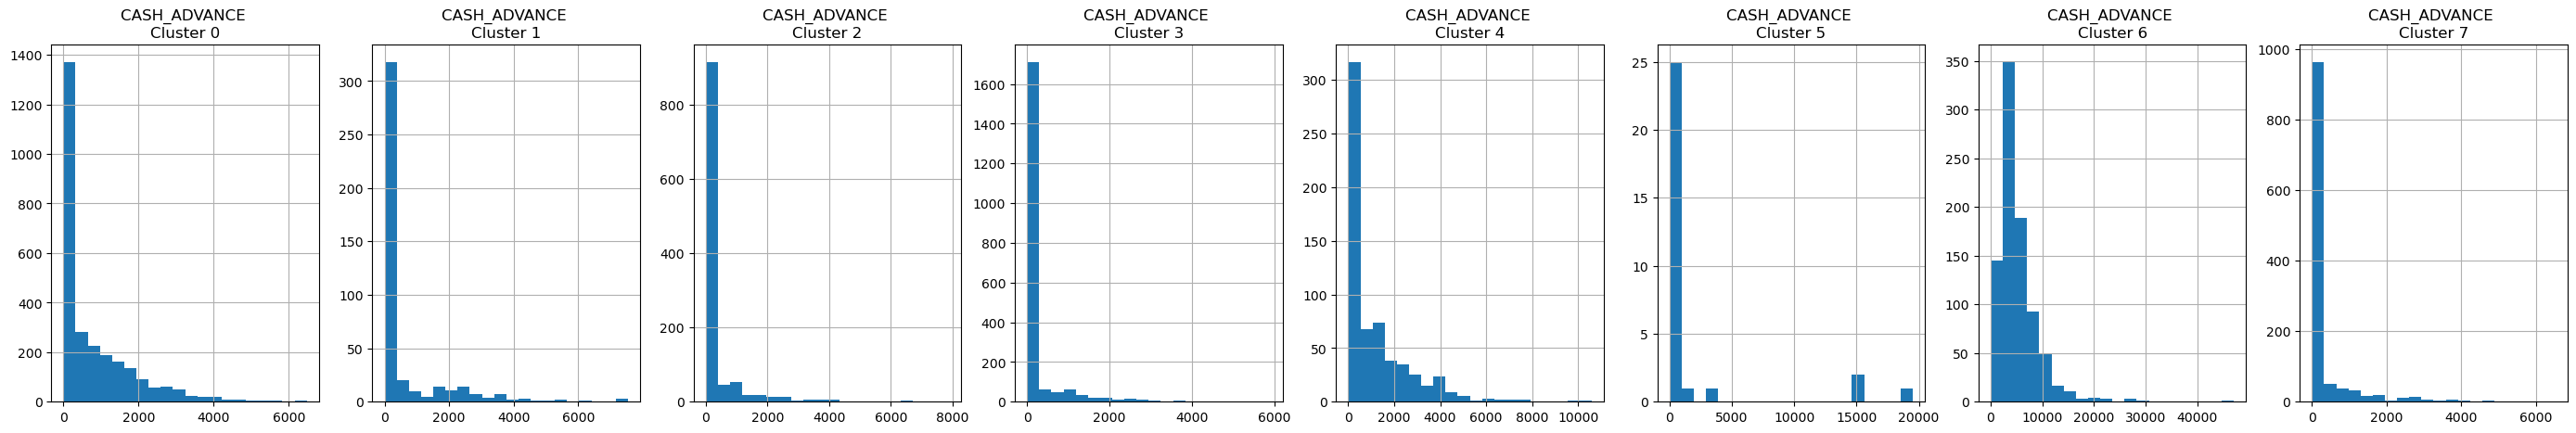

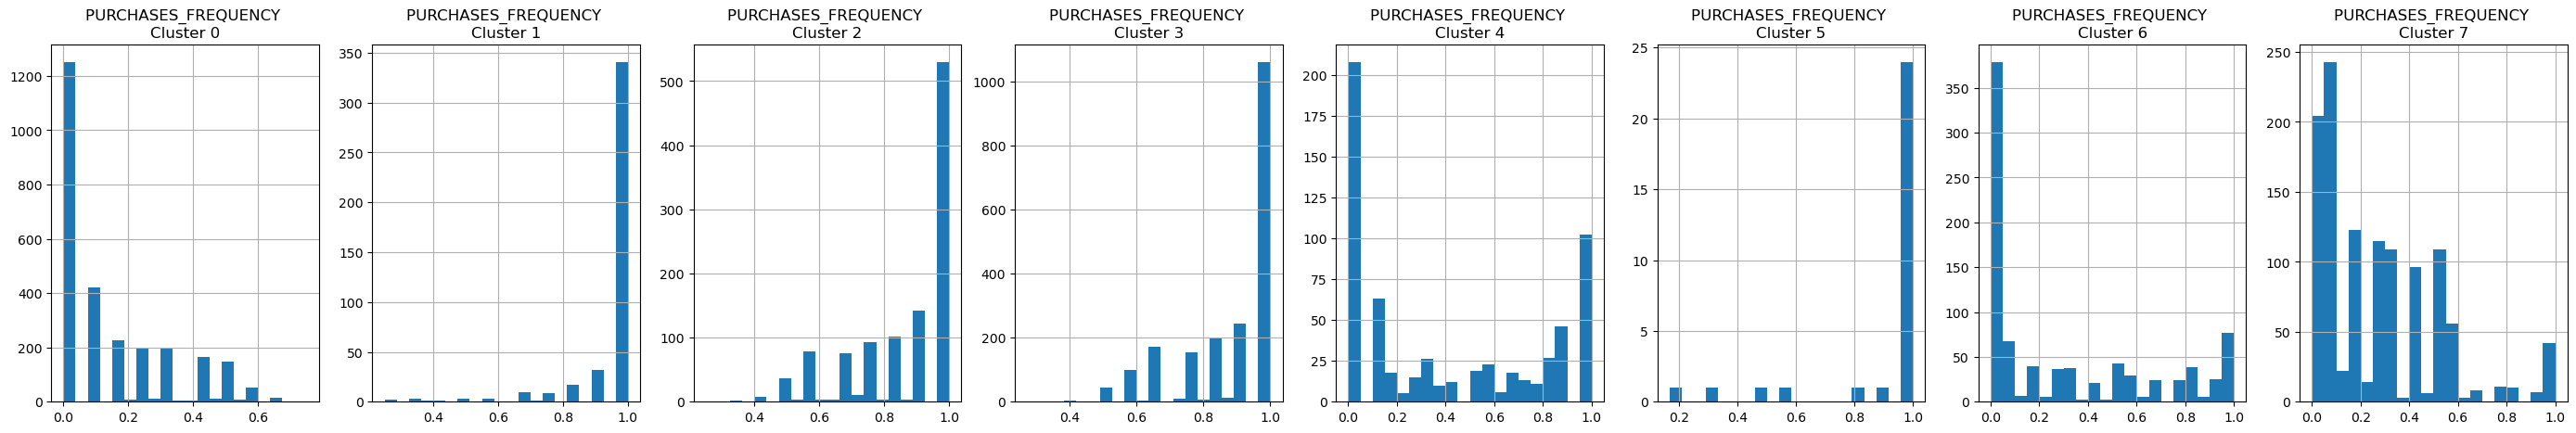

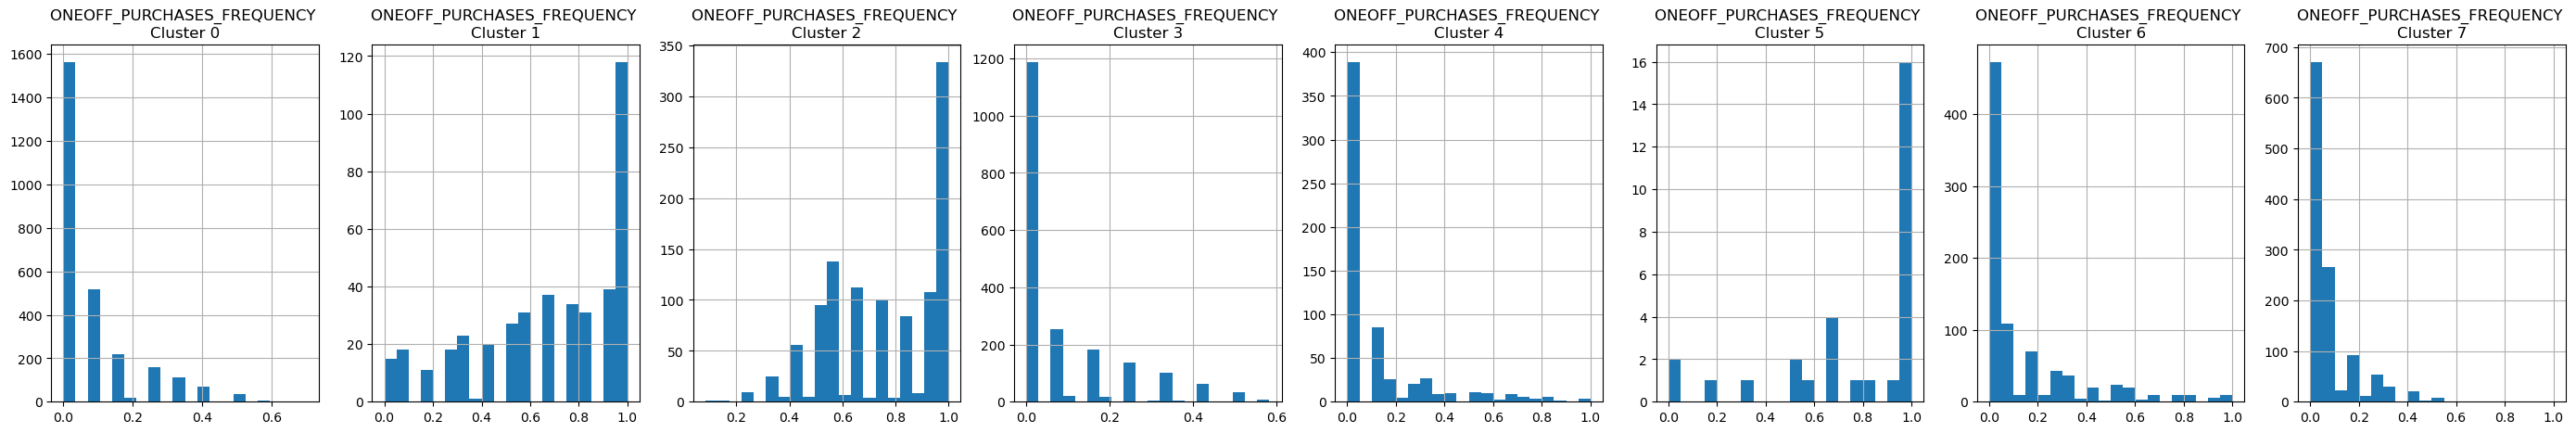

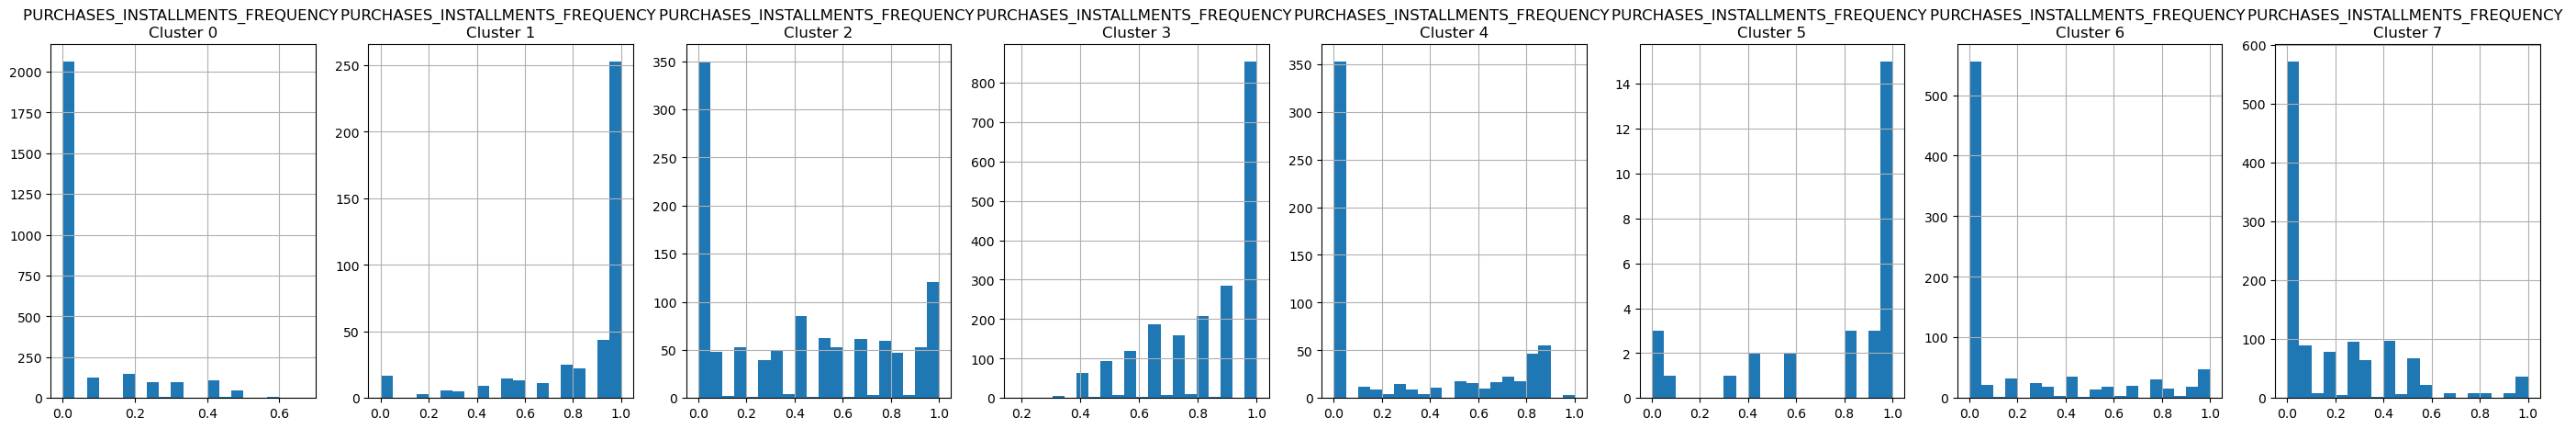

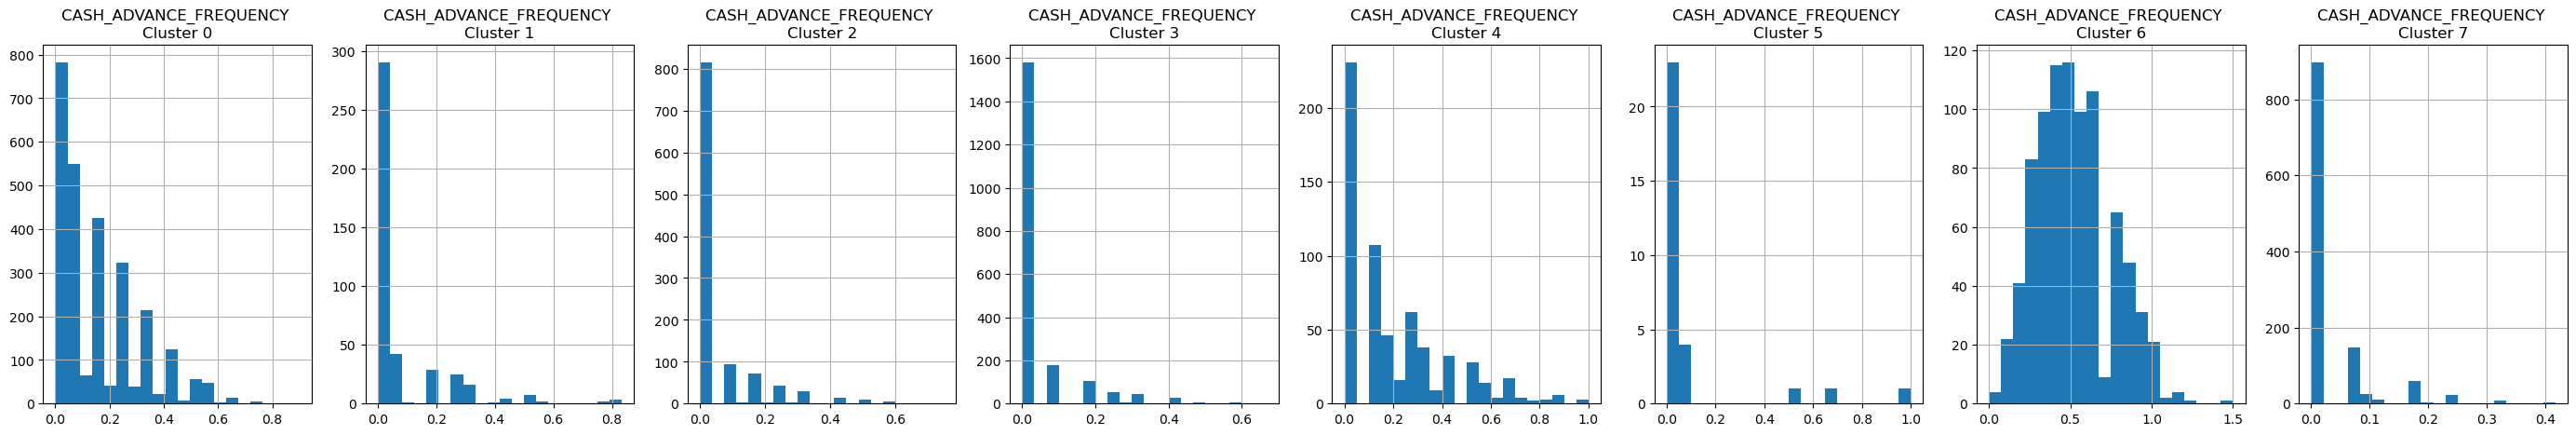

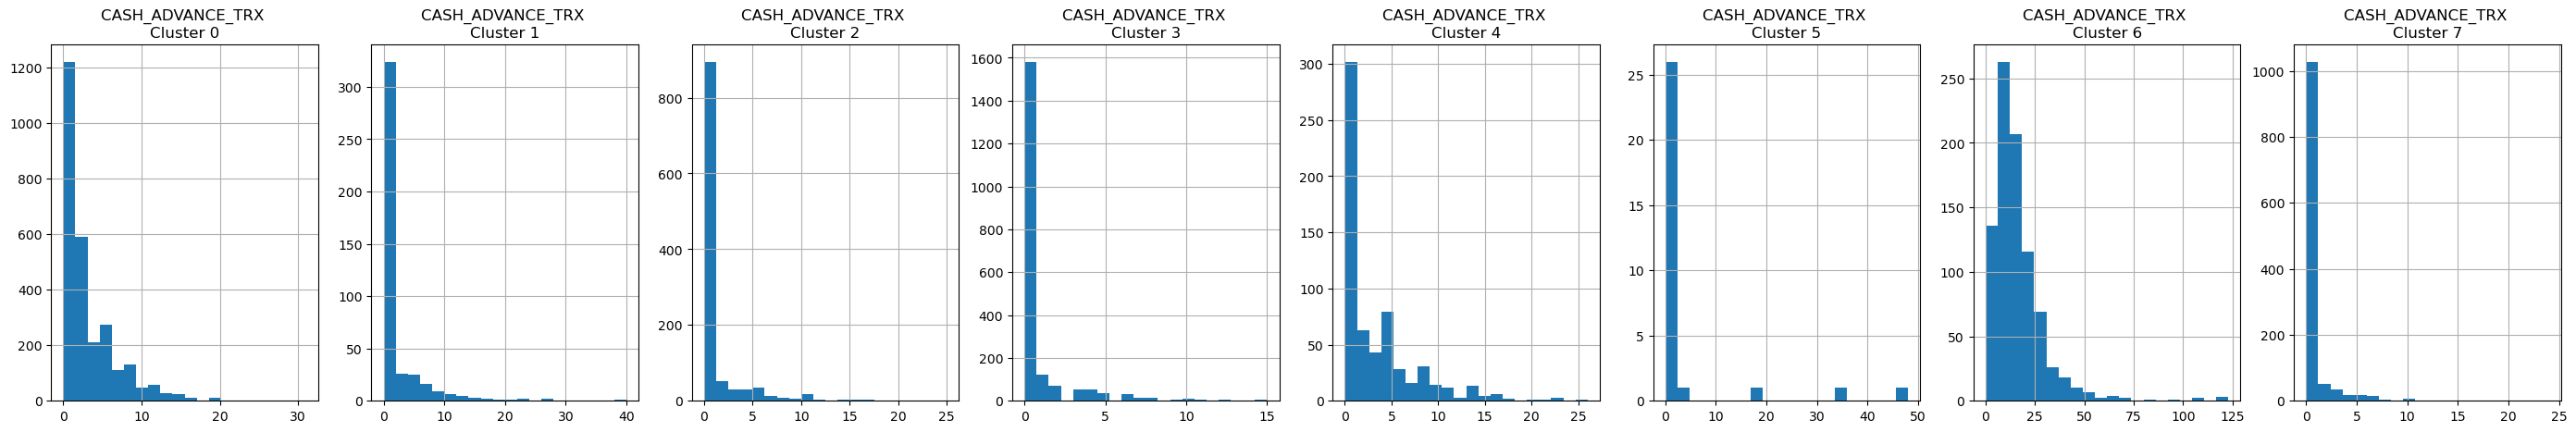

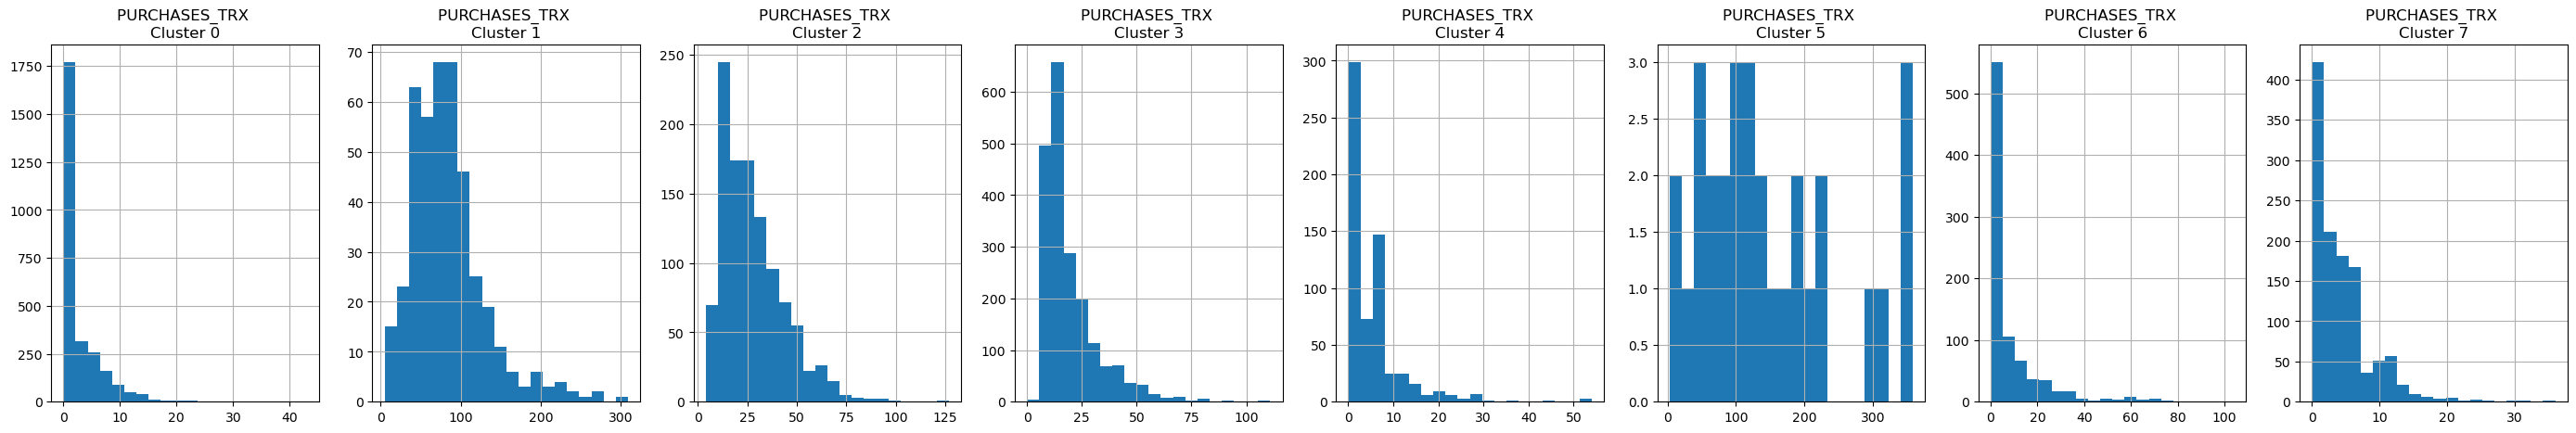

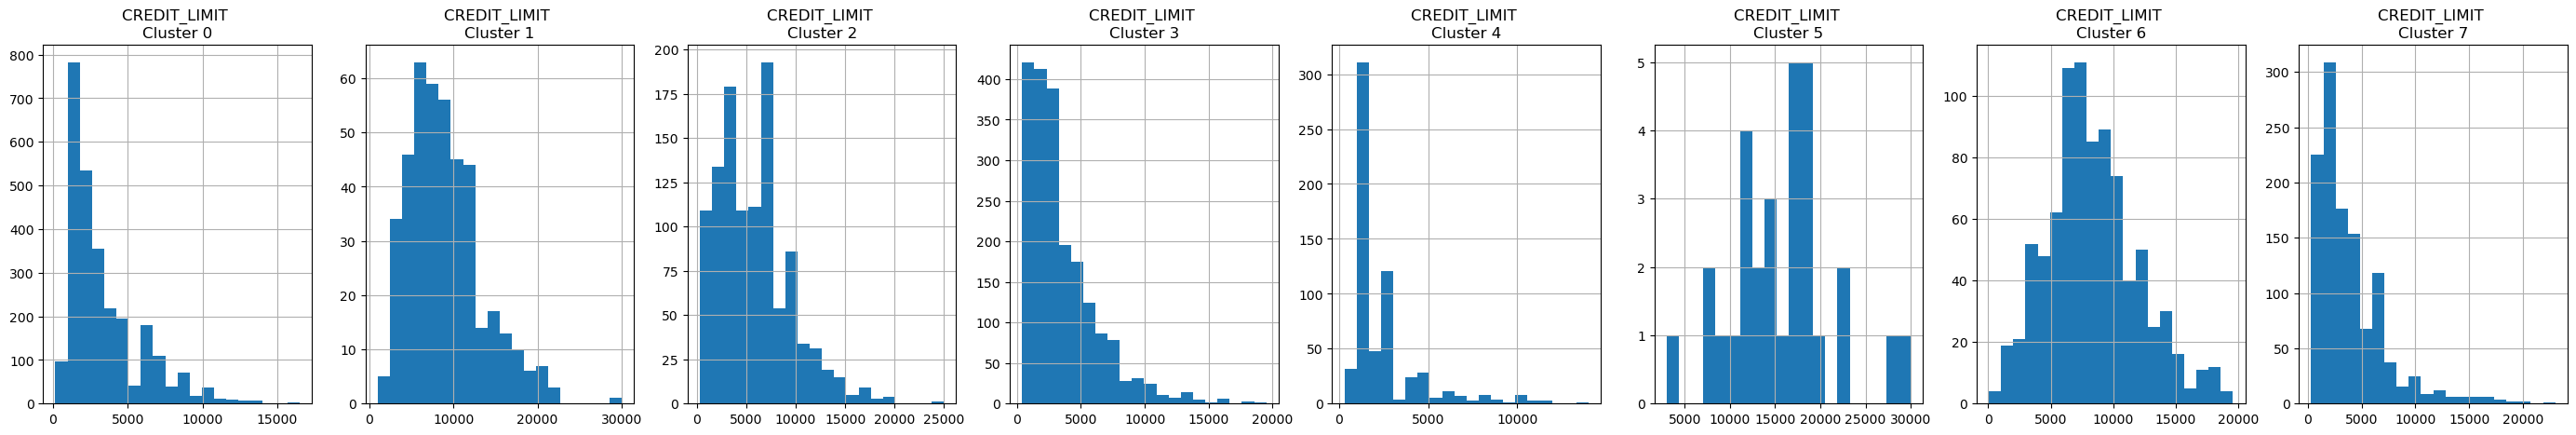

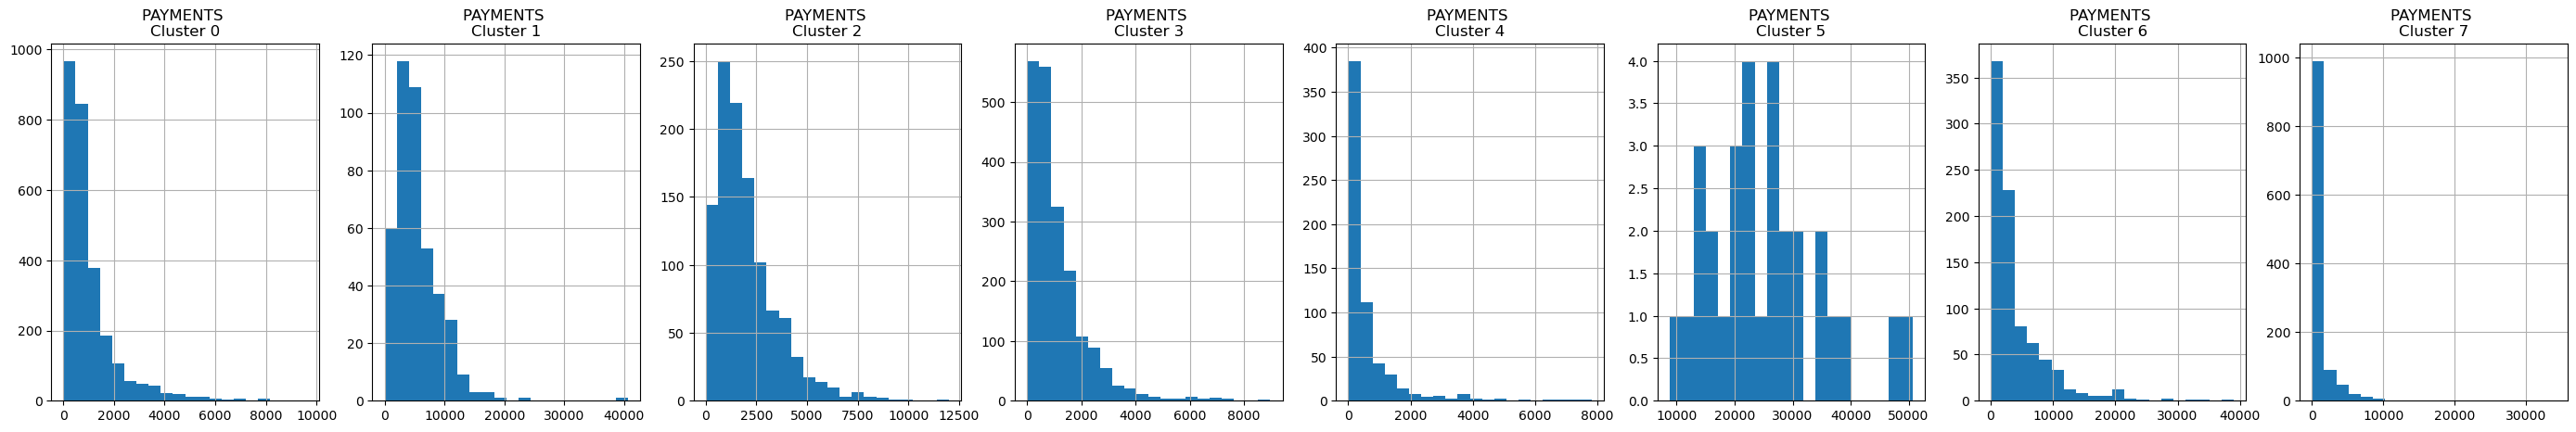

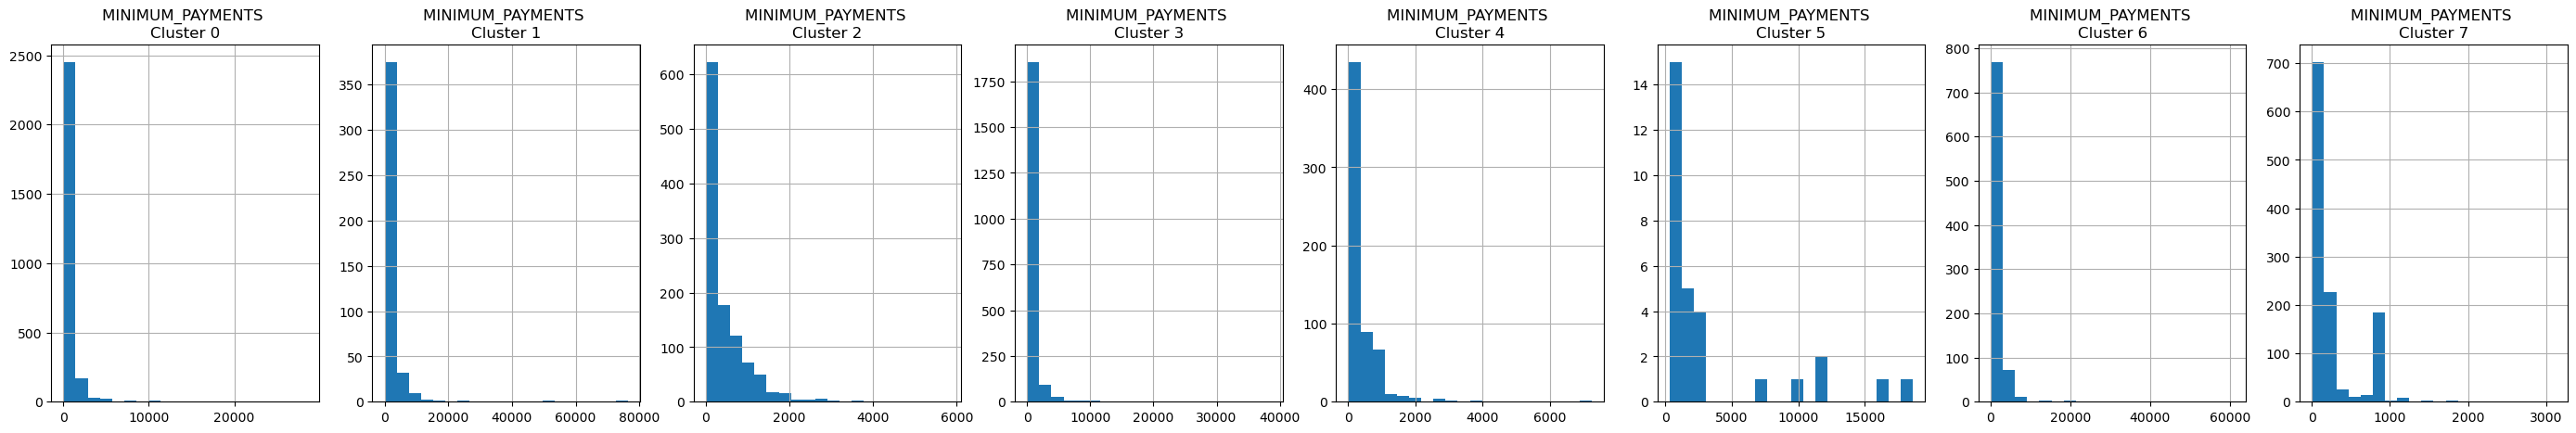

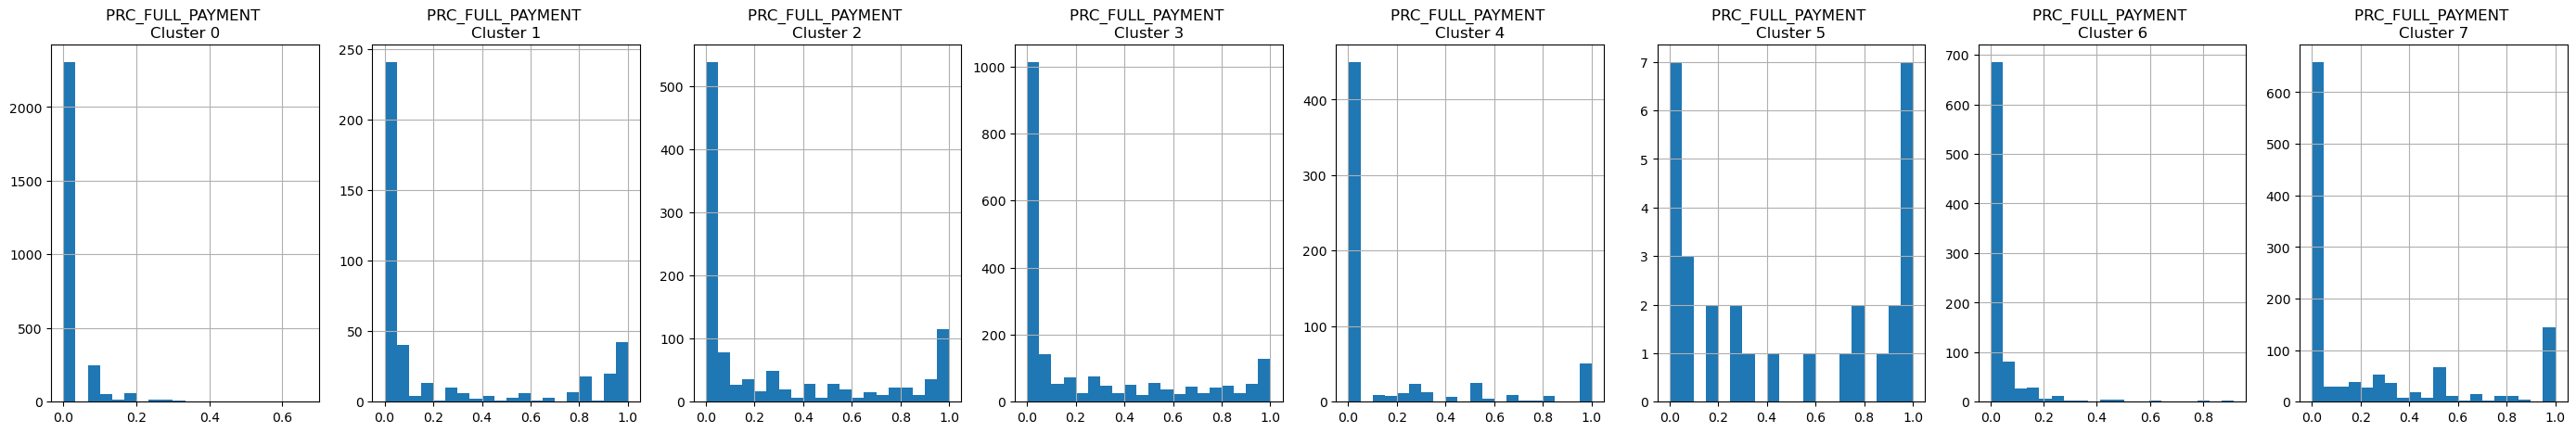

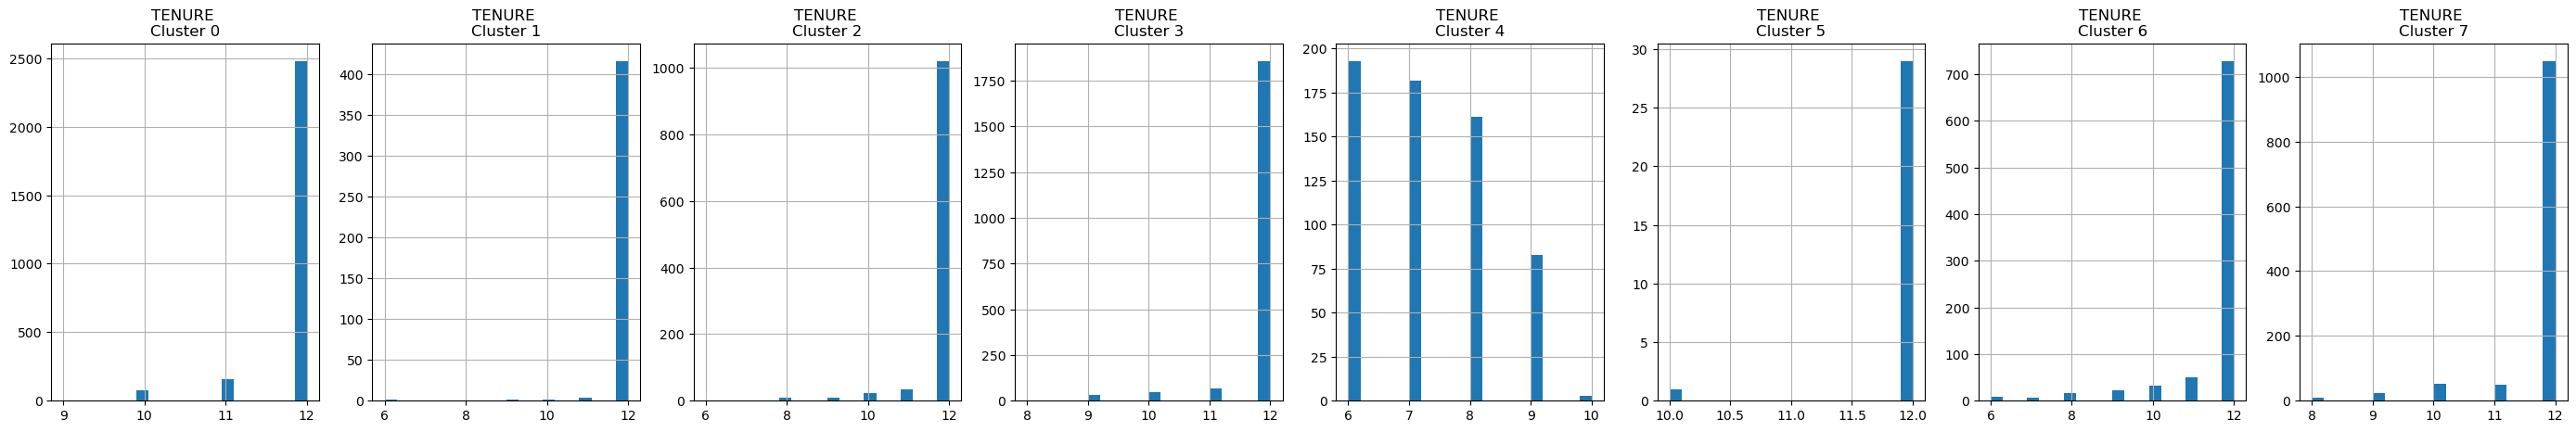

In [42]:
for i in creditcard_df.columns:
  plt.figure(figsize=(35,5))
  for j in range(8):
    plt.subplot(1, 8, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [43]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
4225,226.785380,1.000000,210.64,210.64,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3500.0,295.155445,176.886468,0.000000,12,0
4226,41.643083,1.000000,212.00,212.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,596.834019,47.139699,0.083333,12,0
4227,291.663664,1.000000,129.00,129.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,5500.0,284.596786,200.845446,0.000000,12,0
4228,1437.977941,1.000000,229.94,229.94,0.0,901.185629,0.250000,0.250000,0.000000,0.583333,10,4,1800.0,783.528158,394.172631,0.000000,12,0


In [44]:
credit_ordered.tail()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1254,939.102758,0.363636,0.00,0.00,0.00,3470.939551,0.000000,0.000000,0.000000,0.166667,4,0,4000.0,501.827788,855.398440,0.0,12,7
1253,75.039332,0.272727,588.05,588.05,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,5,9000.0,707.386471,18.113017,0.0,12,7
7647,1.533981,0.545455,141.56,0.00,141.56,0.000000,0.500000,0.000000,0.500000,0.000000,0,6,4000.0,248.103302,44.570781,1.0,12,7
7643,0.407093,0.090909,49.00,49.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,3000.0,0.000000,864.206542,0.0,12,7
5530,26.982025,0.181818,237.60,0.00,237.60,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,2500.0,0.000000,864.206542,0.0,12,7


In [45]:
credit_ordered.to_csv('cluster.csv')


# PCA (principal component analysis)

In [46]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222005, -1.07645162],
       [-1.13829346,  2.50646001],
       [ 0.96968369, -0.38352071],
       ...,
       [-0.92620405, -1.8107788 ],
       [-2.33655221, -0.6579573 ],
       [-0.55642273, -0.4004641 ]])

In [47]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682220,-1.076452
1,-1.138293,2.506460
2,0.969684,-0.383521
3,-0.873627,0.043158
4,-1.599434,-0.688578


In [48]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682220,-1.076452,0
1,-1.138293,2.506460,6
2,0.969684,-0.383521,2
3,-0.873627,0.043158,0
4,-1.599434,-0.688578,0


<Axes: xlabel='pca1', ylabel='pca2'>

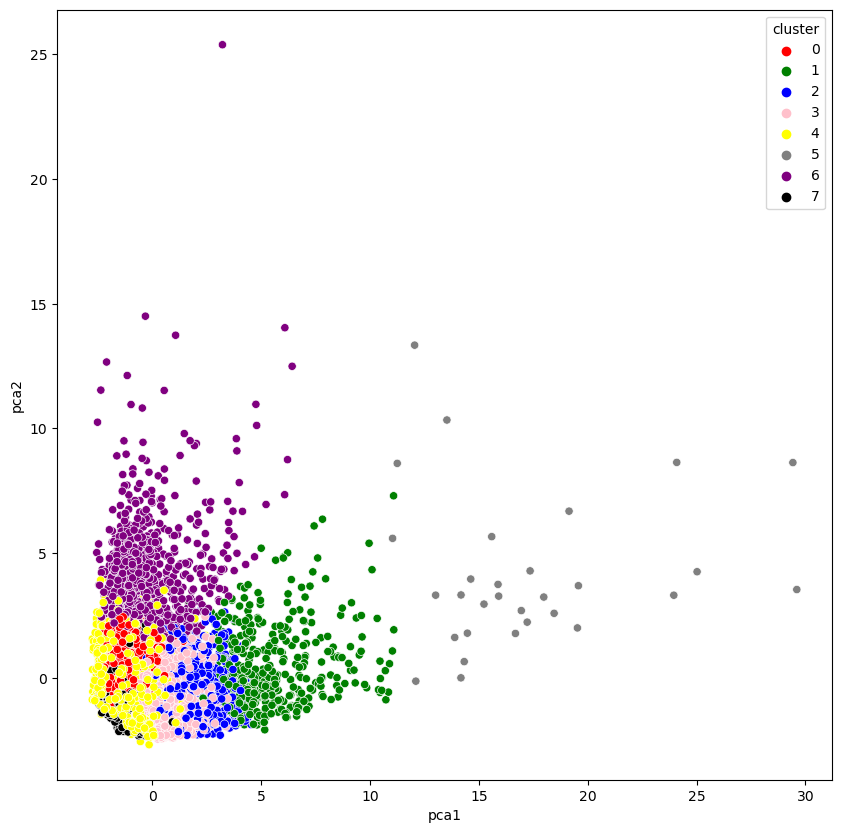

In [49]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# autoencoders

In [50]:
creditcard_df_scaled.shape


(8950, 17)

In [51]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [52]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)


In [53]:
autoencoder = Model(input_df, decoded)


In [54]:
encoder = Model(input_df, encoded)


In [55]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')


In [56]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)


Epoch 1/50

280/280 [==============================] - 10s 30ms/step - loss: 0.1994
Epoch 2/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0878
Epoch 3/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0683
Epoch 4/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0516
Epoch 5/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0584
Epoch 6/50
280/280 [==============================] - 8s 28ms/step - loss: 0.1032
Epoch 7/50
280/280 [==============================] - 9s 34ms/step - loss: 0.0696
Epoch 8/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0374
Epoch 9/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0402
Epoch 10/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0345
Epoch 11/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0381
Epoch 12/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0554
Epoch 13/50

In [57]:
creditcard_df_scaled.shape


(8950, 17)

In [58]:
compact = encoder.predict(creditcard_df_scaled)


280/280 [==============================] - 1s 3ms/step


In [59]:
compact.shape


(8950, 10)

In [60]:
creditcard_df_scaled[0]


array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [61]:
compact[0]


array([0.        , 0.        , 0.64275277, 0.21021815, 0.46792045,
       0.74682355, 0.6053667 , 0.        , 0.09891538, 0.03848841],
      dtype=float32)

In [62]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

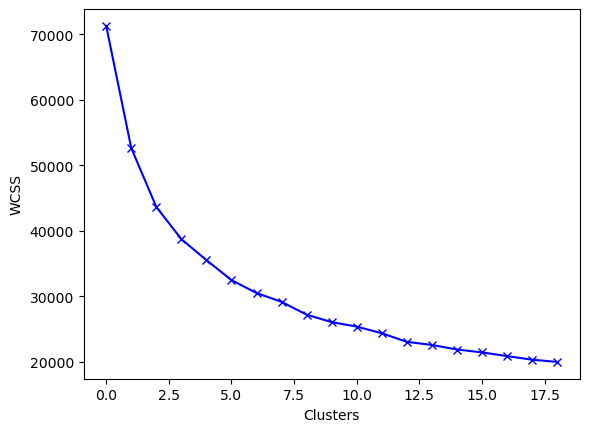

In [63]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

C:\Users\himan\AppData\Local\Temp\ipykernel_15256\1332322834.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
C:\Users\himan\AppData\Local\Temp\ipykernel_15256\1332322834.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


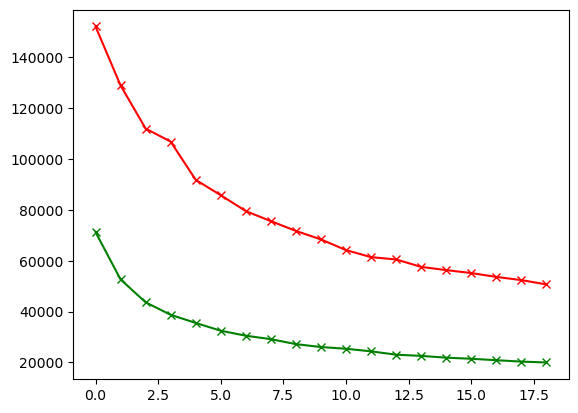

In [64]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

C:\Users\himan\AppData\Local\Temp\ipykernel_15256\281201215.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


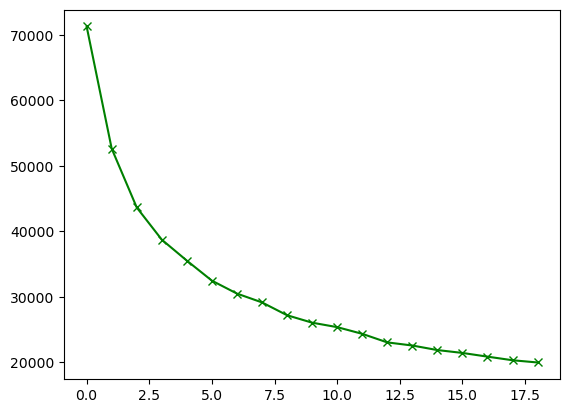

In [65]:
plt.plot(wcss_2, 'bx-', color = 'g');

In [66]:
labels = kmeans.labels_
labels, labels.shape

(array([ 9,  7,  4, ..., 15, 15, 15]), (8950,))

In [67]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,9
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,9


In [68]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.545706,-0.241131
1,0.417946,1.208697
2,-0.609670,-0.728968
3,-0.187889,0.093674
4,-1.525294,-0.293319


In [69]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.545706,-0.241131,9
1,0.417946,1.208697,7
2,-0.609670,-0.728968,4
3,-0.187889,0.093674,3
4,-1.525294,-0.293319,9


C:\Users\himan\AppData\Local\Temp\ipykernel_15256\3624821664.py:2: UserWarning: 
The palette list has fewer values (4) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])


<Axes: xlabel='pca1', ylabel='pca2'>

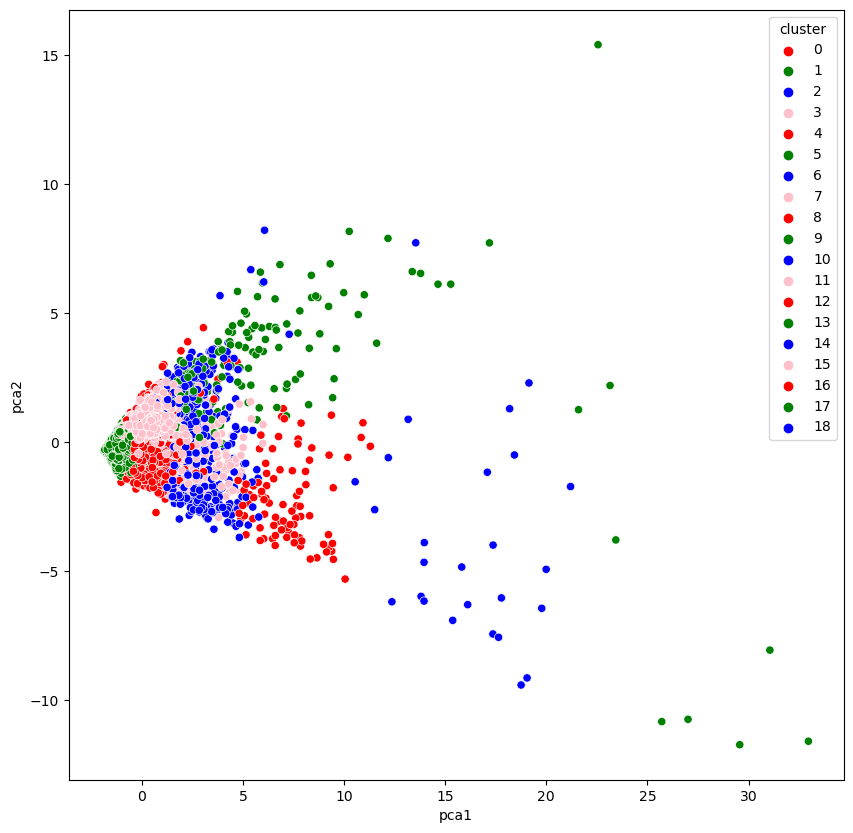

In [70]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [71]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
4122,382.449723,1.000000,4162.66,917.78,3244.88,0.0,1.000000,0.416667,1.000000,0.0,0,60,5000.0,4103.998759,190.768834,0.833333,12,0
6524,38.086857,0.545455,447.78,0.00,447.78,0.0,0.416667,0.000000,0.416667,0.0,0,6,4000.0,757.855943,143.536600,1.000000,12,0
7896,134.961317,1.000000,1432.66,644.67,787.99,0.0,1.000000,0.416667,1.000000,0.0,0,74,2000.0,1276.016501,162.738008,0.666667,12,0
7892,25.192974,0.545455,764.64,0.00,764.64,0.0,1.000000,0.000000,1.000000,0.0,0,12,4000.0,1074.956132,88.325372,0.545455,12,0
859,1374.460976,1.000000,1990.81,0.00,1990.81,0.0,1.000000,0.000000,0.916667,0.0,0,31,5000.0,0.000000,864.206542,0.000000,12,0


In [72]:
df_cluster_ordered.tail()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
86,7069.950386,1.0,1603.78,1445.14,158.64,5626.004046,1.000000,0.833333,1.0,0.750000,23,23,11000.0,4589.873897,1876.262988,0.000000,12,18
1333,5729.703345,1.0,265.00,265.00,0.00,3543.644920,0.090909,0.090909,0.0,0.272727,6,1,14000.0,11707.953520,1162.329835,0.000000,11,18
2888,5392.295980,1.0,0.00,0.00,0.00,4020.930800,0.000000,0.000000,0.0,0.250000,5,0,8000.0,8237.315179,1167.409427,0.090909,12,18
4995,4274.488095,1.0,0.00,0.00,0.00,12527.491290,0.000000,0.000000,0.0,0.583333,17,0,10500.0,9836.835644,1115.092967,0.083333,12,18
1282,5086.333429,1.0,548.89,548.89,0.00,7298.311320,0.166667,0.166667,0.0,0.500000,11,3,8500.0,7327.589749,1146.630327,0.000000,12,18
